In [1]:
#| hide
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
from fractalart.fractal.mandelbrot import *

In [3]:
def save_image(
    image: np.ndarray,
    path: Path,
    cmap: str = "turbo",
    dpi: int = 300,
    transparent: bool = False,
    tight: bool = True,
) -> None:
    """
    Save a NumPy array as an image file.

    Parameters
    ----------
    image : np.ndarray
        2D or 3D array representing the image.
    path : Path
        File path where the image will be saved.
    cmap : str, optional
        Matplotlib colormap to apply (used if image is 2D). Default is "turbo".
    dpi : int, optional
        Resolution (dots per inch) of the saved image. Default is 300.
    transparent : bool, optional
        If True, save the figure with a transparent background. Default is False.
    tight : bool, optional
        If True, trims whitespace around the image. Default is True.
    """
    path = Path(path)
    path.parent.mkdir(parents=True, exist_ok=True)  # ensure folder exists

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.axis("off")

    # Show grayscale/color images depending on array shape
    if image.ndim == 2:  
        ax.imshow(image, cmap=cmap)
    else:  
        ax.imshow(image)
        
    fig.savefig(
        path,
        dpi=dpi,
        transparent=transparent,
        bbox_inches="tight" if tight else None,
        pad_inches=0
    )

    plt.close(fig)


In [81]:
res = 600
dpi = 200
max_iter = 10000
c = 0

z = 1.0
while z < 200000:
    zoom = z
    m = Mandelbrot()
    m.resolution = (res, res)
    m.max_iter = max_iter
    f = 1 - 1 / (2 * z)
    x, y = -0.5 + f * (0.5 + 0.42884) * f , -0.231345 * f
    #center = (0.42884 / z , -0.231345)
    center = (x, y)
    m.set_zoom(zoom, center)
    m.render()
    m.equalize_histogram()
    image = m.image
    p = f'/Users/eandreas/tmp/fractals/movie/images/fractal_{c}.png'
    save_image(image, path=p, dpi=dpi)
    c += 1
    z = z * 1.025

In [82]:
fps = 30

import cv2
import glob
import os

# Folder containing the PNG files
folder = '/Users/eandreas/tmp/fractals/movie/images'

# Get list of files sorted numerically
files = sorted(
    glob.glob(os.path.join(folder, 'fractal_*.png')),
    key=lambda x: int(os.path.splitext(os.path.basename(x))[0].replace('fractal_', ''))
)

# Read the first image to get the size
frame = cv2.imread(files[0])
height, width, layers = frame.shape
size = (width, height)

# Define the video writer
out = cv2.VideoWriter('/Users/eandreas/tmp/fractals/movie/fractal_movie.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, size)
# 10 = frames per second, you can adjust

# Write each frame
for filename in files:
    img = cv2.imread(filename)
    out.write(img)

# Release the video writer
out.release()
print("Video created: /Users/eandreas/tmp/fractals/movie/fractal_movie.mp4")

Video created: /Users/eandreas/tmp/fractals/movie/fractal_movie.mp4


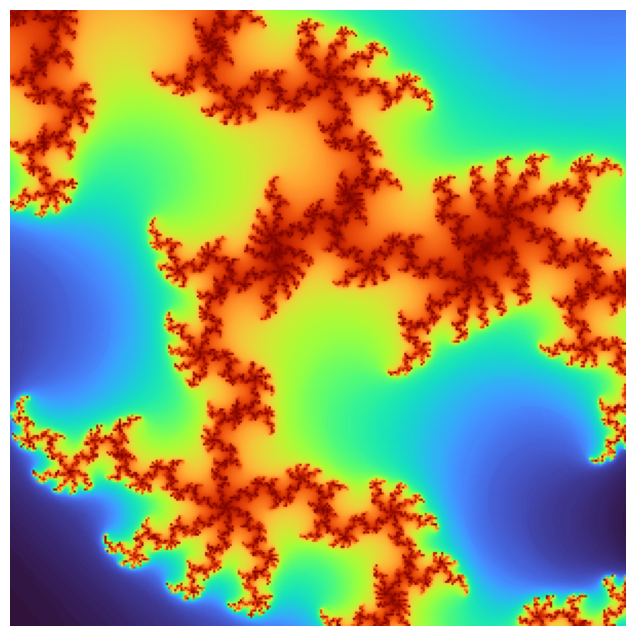

In [15]:
center = (0.42884, -0.231345)
zoom = 78125

m = Mandelbrot()
m.set_zoom(zoom, center)
m.resolution = (300, 300)
image = m.render()
m.equalize_histogram()
m.plot()